In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 설명
- `oem_odm` : 국내 MAYK 협력 OEM / ODM의 데이터베이스 (누구를 대상으로 하는 어떤 화장품을 MoQ 얼마만큼에 판매를 하는지)
- `seller` : 판매 기획 단계에서 판매 주체가 누구를 대상으로 어떤 화장품을 판매할 것인지 기획 -> MAYK 플랫폼에 접속하여 타겟 연령대, 화장품 종류 (스킨, 로션…), 원하는 모양/디자인, 원하는 수량을 임시로 선택한 데이터

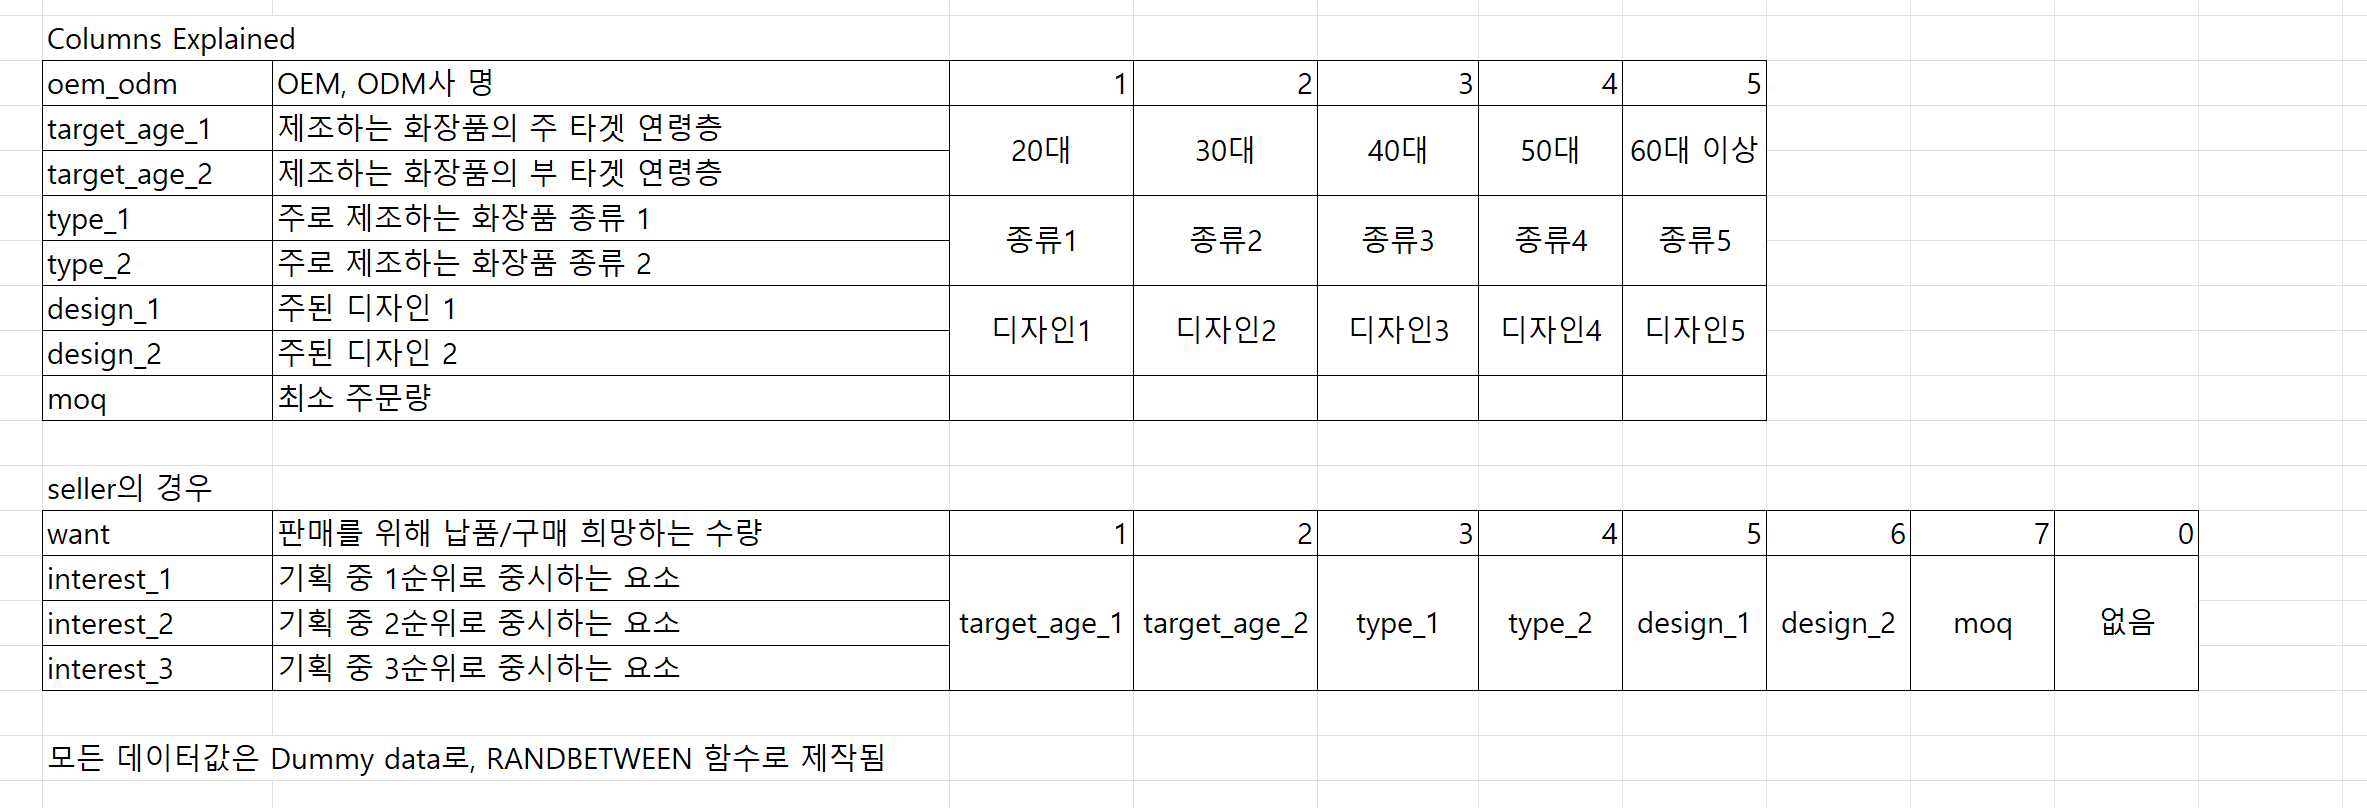

# 데이터 불러오기

In [5]:
oem_odm = pd.read_excel("example data.xlsx", sheet_name='oem_odm')

In [6]:
oem_odm

,oem_odm,target_age_1,target_age_2,type_1,type_2,design_1,design_2,moq
0,A,4,3,4,3,2,1,444
1,B,4,4,2,2,4,2,180
2,C,5,3,1,1,4,5,160
3,D,1,2,3,4,1,2,457
4,E,1,5,4,3,5,2,461
5,F,3,3,2,1,1,4,345
6,G,5,5,3,2,4,4,191
7,H,2,5,3,1,2,5,291
8,I,3,2,4,1,4,3,373
9,J,5,2,4,4,5,5,389


In [7]:
seller = pd.read_excel("example data.xlsx", sheet_name='seller')

In [8]:
seller

,seller,target_age_1,target_age_2,type_1,type_2,design_1,design_2,want,interest_1,interest_2,interest_3
0,woohyun,4,3,5,5,3,2,379,1,6,0
1,dahyun,3,2,4,2,3,5,317,5,6,2
2,minjung,5,2,5,4,4,5,370,6,7,0
3,hyewon,1,1,1,5,1,5,314,1,1,1
4,hyemin,2,5,1,5,4,5,253,6,2,0
5,jina,2,2,3,1,5,2,259,2,4,6
6,minkyung,4,4,2,4,3,3,217,6,4,0


### woohyun 이라는 판매 주체를 예로 들어보자. 이 판매 주체는 `target_age_1`, 즉 화장품의 주된 타겟 연령층과 `design_2`, 즉 화장품 제조업체가 생산하는 부가적인 디자인에 주된 관심을 두고 있다.

#### 이 경우, 해당 두 개의 열과 moq 열을 가져와서 scatterplot을 제작, 이 scatterplot에 woohyun의 데이터를 넣어 가장 가까운 OEM / ODM을 찾는다

In [12]:
woohyun = seller.loc[seller['seller'] == 'woohyun']
woohyun

,seller,target_age_1,target_age_2,type_1,type_2,design_1,design_2,want,interest_1,interest_2,interest_3
0,woohyun,4,3,5,5,3,2,379,1,6,0


In [21]:
x = oem_odm.columns[woohyun['interest_1']]
y = oem_odm.columns[woohyun['interest_2']]
z = oem_odm.columns[[7]]
x, y, z

(Index(['target_age_1'], dtype='object'),
 Index(['design_2'], dtype='object'),
 Index(['moq'], dtype='object'))

In [23]:
X = oem_odm[x]
Y = oem_odm[y]
Z = oem_odm[z]

Text(0.5, 0, 'MoQ')

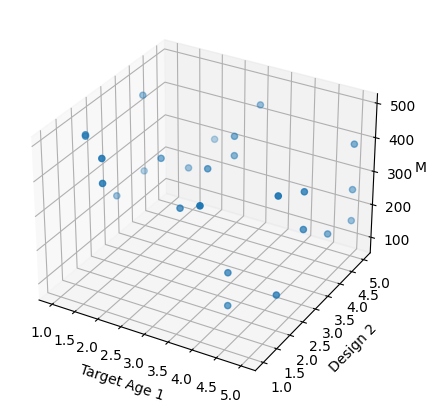

In [41]:
fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z)

ax.set_xlabel('Target Age 1')
ax.set_ylabel('Design 2')
ax.set_zlabel('MoQ')

#### 이게 이제 OEM, ODM들의 해당 가중치들에 대한 산점도

In [36]:
z_want = seller.columns[[7]]

x_woohyun = woohyun[x]
y_woohyun = woohyun[y]
z_woohyun = woohyun[z_want]

Text(0.5, 0, 'MoQ')

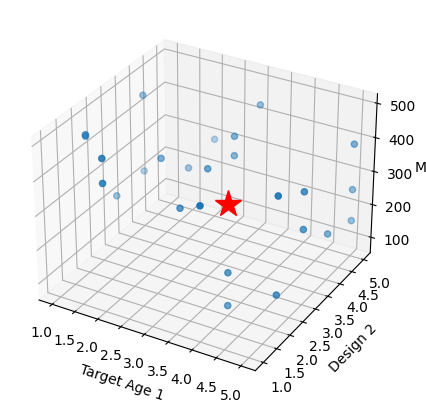

In [42]:
fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z)
ax.plot(x_woohyun, y_woohyun, z_woohyun, marker='*', ms=20, color='red')
ax.set_xlabel('Target Age 1')
ax.set_ylabel('Design 2')
ax.set_zlabel('MoQ')

#### 이게 위의 산점도에서 woohyun의 위치

#### 이때 여기서 가장 가까운 점을 찾기!

In [63]:
X[X.columns[0]][0]

4

In [65]:
oem_odm_points = []
for i in range(len(oem_odm)) :
    coordinates = [X[X.columns[0]][i], Y[Y.columns[0]][i], Z[Z.columns[0]][i]]
    oem_odm_points.append(coordinates)

In [66]:
oem_odm_points[0]

[4, 1, 444]

In [72]:
woohyun_point = [x_woohyun[x_woohyun.columns[0]][0], y_woohyun[y_woohyun.columns[0]][0], z_woohyun[z_woohyun.columns[0]][0]]

In [78]:
import math as mt

In [81]:
results = []
for i in range(len(oem_odm_points)) :
    dists = int(mt.dist(oem_odm_points[i], woohyun_point))
    results.append(dists)

In [83]:
print(results)

[65, 199, 219, 78, 82, 34, 188, 88, 6, 10, 23, 71, 221, 14, 165, 52, 48, 6, 157, 63, 125, 109, 297, 103, 118, 52]


In [94]:
oem_odm[['oem_odm']]

,oem_odm
0,A
1,B
2,C
3,D
4,E
5,F
6,G
7,H
8,I
9,J


In [101]:
results_df = oem_odm[['oem_odm']].join(pd.DataFrame({'distance':results}))

In [102]:
results_df

,oem_odm,distance
0,A,65
1,B,199
2,C,219
3,D,78
4,E,82
5,F,34
6,G,188
7,H,88
8,I,6
9,J,10


In [106]:
results_df.sort_values('distance')

,oem_odm,distance
17,R,6
8,I,6
9,J,10
13,N,14
10,K,23
5,F,34
16,Q,48
25,Z,52
15,P,52
19,T,63


## woohyun 판매자는 R, I OEM/ODM과 매칭!